In [31]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle
import pandas as pd
import matplotlib.pyplot as plt

# Carregamento do dataset e particionamento dos dados

In [8]:
# Carregando o dataset contido na biblioteca do scikit learn
iris = datasets.load_iris()

In [21]:
# Particionamento dos dados
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = pd.DataFrame(data=iris.target, columns=['target'])

In [24]:
# Realiza o embaralhamento dos dados - o dataset dá as classes ordenadas
X, y = shuffle(X, y, random_state=42)

# Treinamento do modelo

In [26]:
# Chamada do modelo
model = KMeans(n_clusters=3, random_state=42)

In [27]:
# Treinamento do modelo
iris_kmeans = model.fit(X)

In [40]:
# São os grupos que o algoritmo criou
predicted_labels = iris_kmeans.labels_

# Métrica de desempenho

In [45]:
# Cálculo da Inércia
wcss = [] # Lista para guardar os valores de inércia
K_range = range(1, 11) # Teste de 1 a 10 grupos

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #.inertia_ é o que cálculo a inércia

In [46]:
# Visualizando os valores da inércia para os K
print(wcss)

[681.3706000000003, 152.34795176035794, 78.8556658259773, 57.383873265494934, 49.977678460300126, 39.066035353535376, 34.29822966507177, 30.23585930735931, 28.34002597402598, 26.754848623598637]


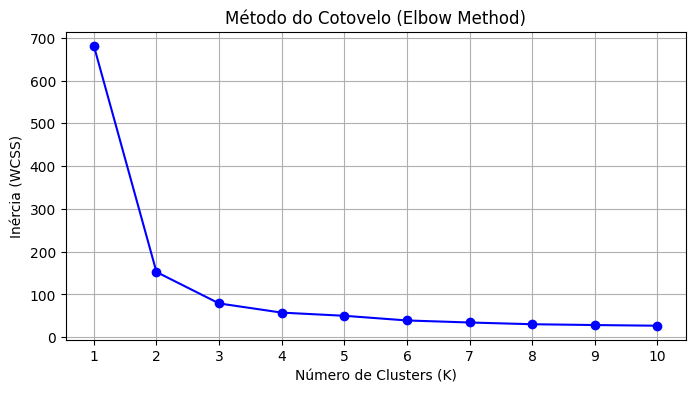

In [47]:
#Plotar o Gráfico do Cotovelo
plt.figure(figsize=(8, 4))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia (WCSS)')
plt.xticks(K_range)
plt.grid(True)

plt.show()

Nota-se que o 3 é quando a inérica começa a ficar com uma queda mais suave, quase insignfiicante

# Visualização do previsto vs real

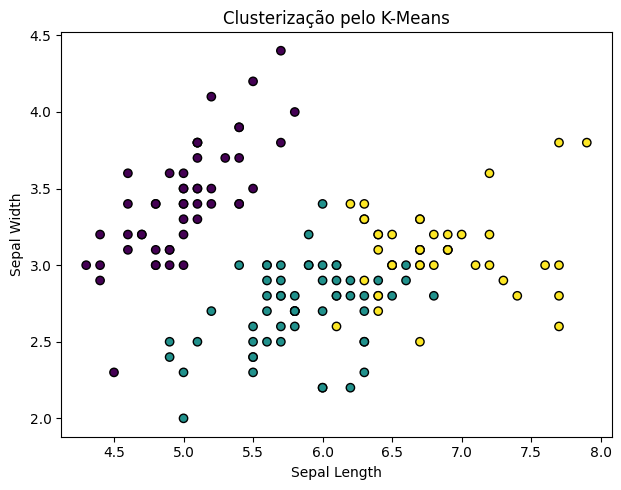

In [48]:
# Gráfico da predição do KMeans

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=predicted_labels, cmap='viridis', edgecolor='k')
plt.title("Clusterização pelo K-Means")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.tight_layout()
plt.show()

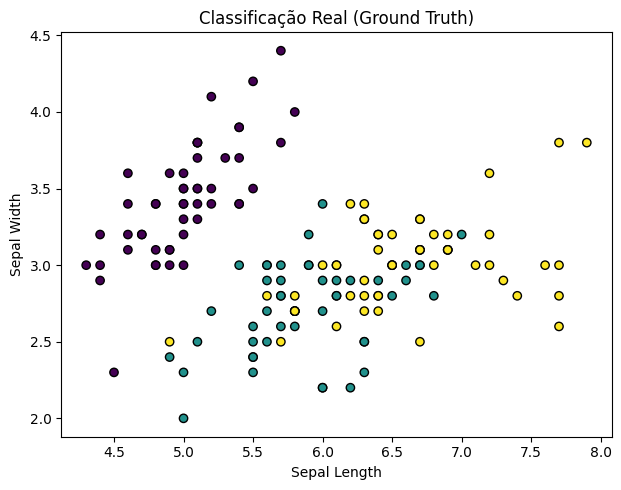

In [49]:
# Gráfico da realidade

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y['target'], cmap='viridis', edgecolor='k')
plt.title("Classificação Real (Ground Truth)")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.tight_layout()
plt.show()